# Airline Customer Loyalty Program and Engagement Analysis

## 1. Data Exploration and Cleaning

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the Data sets
flg_act = pd.read_csv("Customer Flight Activity.csv", parse_dates=True)
lyt_hist = pd.read_csv("Customer Loyalty History.csv", parse_dates=True)

flg_act.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018.0,6.0,12.0,15276.0,22914.0,0.0,0.0
1,100590,2018.0,7.0,12.0,9168.0,13752.0,0.0,0.0
2,100590,2018.0,5.0,4.0,6504.0,9756.0,0.0,0.0
3,100590,2018.0,10.0,0.0,0.0,0.0,512.0,92.0
4,100590,2018.0,2.0,0.0,0.0,0.0,0.0,0.0


In [3]:
flg_act.shape

(205233, 8)

In [4]:
flg_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205233 entries, 0 to 205232
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               205233 non-null  int64  
 1   Year                         205232 non-null  float64
 2   Month                        205232 non-null  float64
 3   Total Flights                205232 non-null  float64
 4   Distance                     205232 non-null  float64
 5   Points Accumulated           205232 non-null  float64
 6   Points Redeemed              205232 non-null  float64
 7   Dollar Cost Points Redeemed  205232 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 12.5 MB


In [5]:
# Checking for nulls
flg_act.isnull().sum()

,0
Loyalty Number,0
Year,1
Month,1
Total Flights,1
Distance,1
Points Accumulated,1
Points Redeemed,1
Dollar Cost Points Redeemed,1


In [6]:
# Checking for duplicates
flg_act[flg_act.duplicated()]

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
176809,357901,2018.0,2.0,0.0,0.0,0.0,0.0,0.0
176811,357901,2018.0,3.0,0.0,0.0,0.0,0.0,0.0
176813,357901,2018.0,4.0,0.0,0.0,0.0,0.0,0.0
176819,357901,2018.0,9.0,0.0,0.0,0.0,0.0,0.0
176822,357901,2018.0,11.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
204791,869265,2017.0,3.0,0.0,0.0,0.0,0.0,0.0
204859,874780,2017.0,3.0,0.0,0.0,0.0,0.0,0.0
204989,886803,2017.0,3.0,0.0,0.0,0.0,0.0,0.0
205016,890361,2017.0,3.0,0.0,0.0,0.0,0.0,0.0


In [7]:
flg_act = flg_act.drop_duplicates()
flg_act.shape

(204932, 8)

In [8]:
lyt_hist.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [9]:
lyt_hist.shape

(16737, 16)

In [10]:
lyt_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [11]:
# Checking for nulls
lyt_hist.isnull().sum()

,0
Loyalty Number,0
Country,0
Province,0
City,0
Postal Code,0
Gender,0
Education,0
Salary,4238
Marital Status,0
Loyalty Card,0


In [12]:
# Checking for duplicates
lyt_hist[lyt_hist.duplicated()]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


## 2. Statistical Analysis

In [13]:
# Exploring the descriptive statistics of the variables
flg_act.describe(include='all')

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,204932.000000,204931.000000,204931.000000,204931.000000,204931.000000,204931.000000,204931.000000,204931.000000
mean,538739.793956,2017.471749,6.061201,2.337031,3503.647067,3558.589074,52.500368,9.451630
std,260273.623860,0.499202,3.572809,1.794370,3185.539961,3587.208363,160.826679,28.953526
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,311946.000000,2017.000000,3.000000,1.000000,1315.000000,1316.000000,0.000000,0.000000
50%,536794.000000,2017.000000,6.000000,2.000000,2685.000000,2692.000000,0.000000,0.000000
75%,762485.000000,2018.000000,9.000000,3.000000,4980.000000,4990.000000,0.000000,0.000000
max,999982.000000,2018.000000,12.000000,28.000000,65184.000000,97776.000000,876.000000,158.000000


In [14]:
# Exploring the descriptive statistics of the variables
lyt_hist.describe(include='all')

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,16737,16737,16737,16737,16737,16737,12499.000000,16737,16737,16737.000000,16737,16737.000000,16737.000000,2067.000000,2067.000000
unique,NaN,1,11,29,55,2,5,NaN,3,3,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,NaN,Married,Star,NaN,Standard,NaN,NaN,NaN,NaN
freq,NaN,16737,5404,3351,911,8410,10475,NaN,9735,7637,NaN,15766,NaN,NaN,NaN,NaN
mean,549735.880445,NaN,NaN,NaN,NaN,NaN,NaN,79245.609409,NaN,NaN,7988.896536,NaN,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,NaN,NaN,NaN,NaN,NaN,NaN,35008.297285,NaN,NaN,6860.982280,NaN,1.979111,3.398958,1.380743,3.455297
min,100018.000000,NaN,NaN,NaN,NaN,NaN,NaN,-58486.000000,NaN,NaN,1898.010000,NaN,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,NaN,NaN,NaN,NaN,NaN,NaN,59246.500000,NaN,NaN,3980.840000,NaN,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,NaN,NaN,NaN,NaN,NaN,NaN,73455.000000,NaN,NaN,5780.180000,NaN,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,NaN,NaN,NaN,NaN,NaN,NaN,88517.500000,NaN,NaN,8940.580000,NaN,2017.000000,10.000000,2018.000000,10.000000


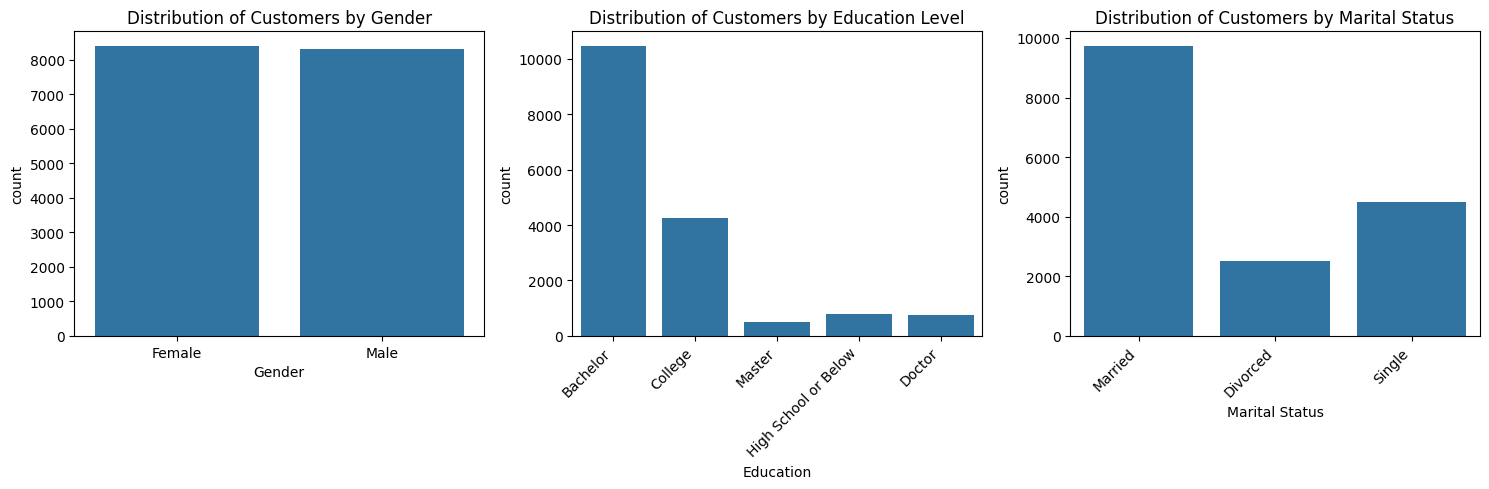

In [15]:
# combined_df = pd.merge(flg_act, lyt_hist, on='CustomerID', how='inner')

# Create the bar chart
plt.figure(figsize=(15, 5))

# Gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=lyt_hist)
plt.title('Distribution of Customers by Gender')

# Education level distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Education', data=lyt_hist)
plt.title('Distribution of Customers by Education Level')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Marital status distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Marital Status', data=lyt_hist)
plt.title('Distribution of Customers by Marital Status')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

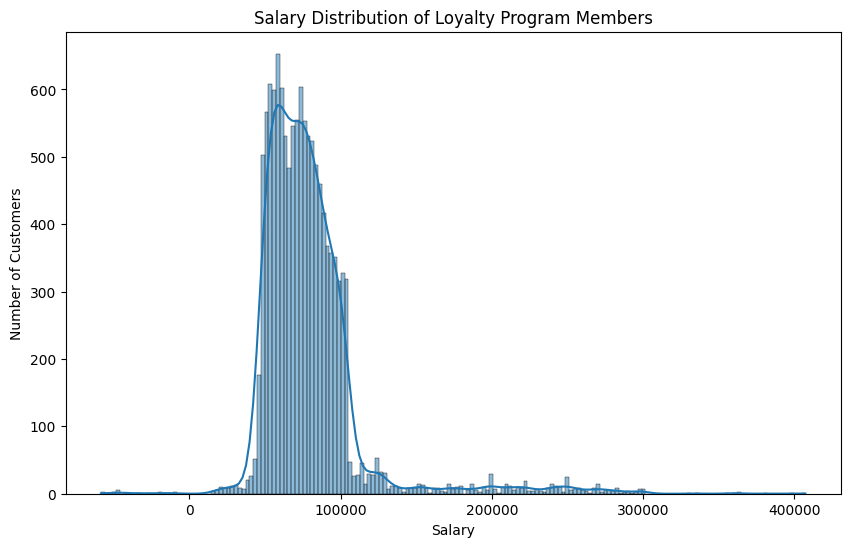

In [16]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(lyt_hist['Salary'], kde=True)  # Use 'Annual Income' column
plt.title('Salary Distribution of Loyalty Program Members')
plt.xlabel('Salary')
plt.ylabel('Number of Customers')
plt.show()

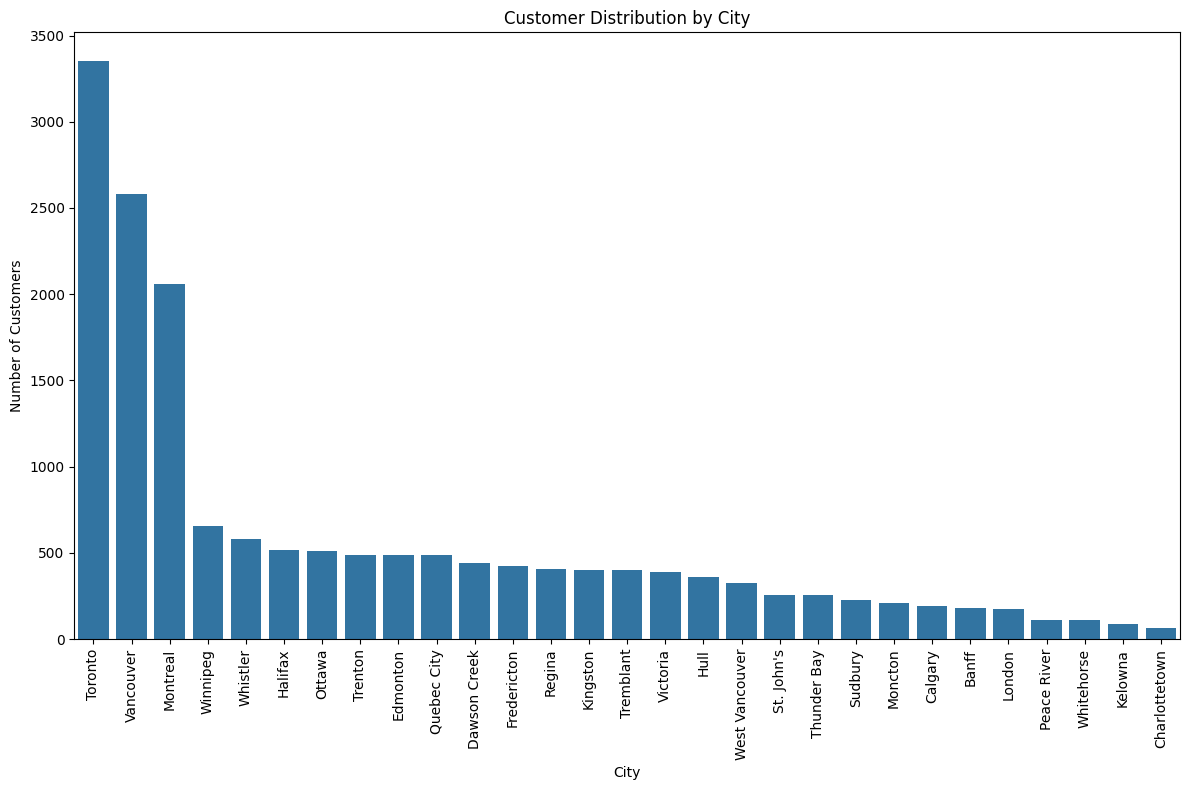

In [17]:
# Geographical Map: Customer distribution by province or city
plt.figure(figsize=(12, 8))

if 'City' in lyt_hist.columns:
    city_counts = lyt_hist['City'].value_counts()
    sns.barplot(x=city_counts.index, y=city_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel('City')
    plt.ylabel('Number of Customers')
    plt.title('Customer Distribution by City')

elif 'Province' in lyt_hist.columns:
    province_counts = lyt_hist['Province'].value_counts()
    sns.barplot(x=province_counts.index, y=province_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel('Province')
    plt.ylabel('Number of Customers')
    plt.title('Customer Distribution by Province')

else:
    print("No 'City' or 'Province' column found in the dataset.")

plt.tight_layout()
plt.show()

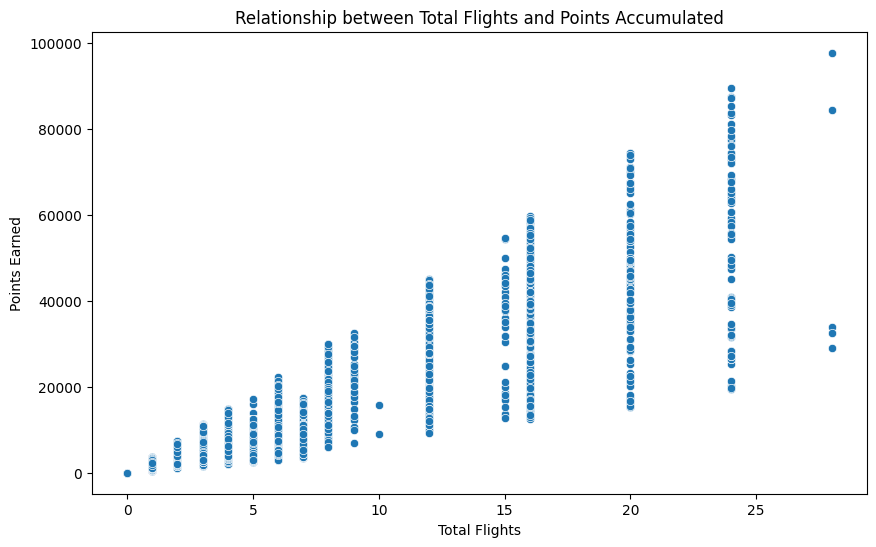

In [25]:
# Scatter plot showcasing relationship between total flights and points accumulated

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Flights', y='Points Accumulated', data= flg_act)  # Use your dataframe here
plt.title('Relationship between Total Flights and Points Accumulated')
plt.xlabel('Total Flights')
plt.ylabel('Points Earned')
plt.show()

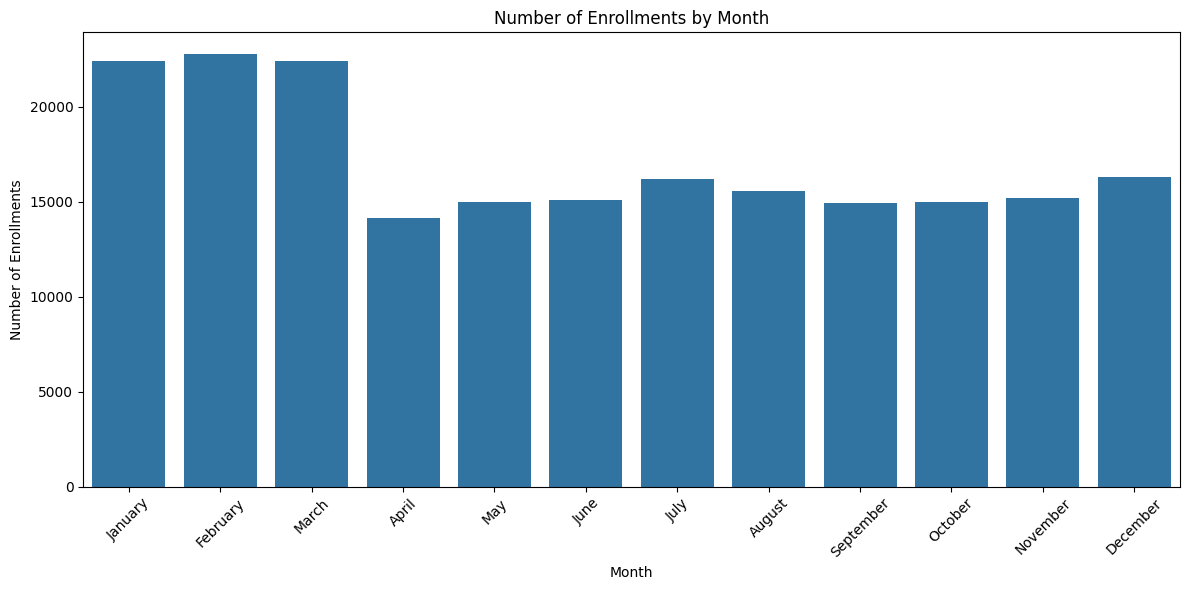

In [28]:
# Number of enrollments by Month

# Replace month numbers with names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

if 'Month' in flg_act.columns:
    flg_act['MonthName'] = flg_act['Month'].map(month_mapping)

    # Create the bar chart
    plt.figure(figsize=(12, 6))
    sns.countplot(x='MonthName', data=flg_act, order=list(month_mapping.values())) # Order months correctly
    plt.title('Number of Enrollments by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Enrollments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("'Month' column not found in the 'flg_act' DataFrame.")

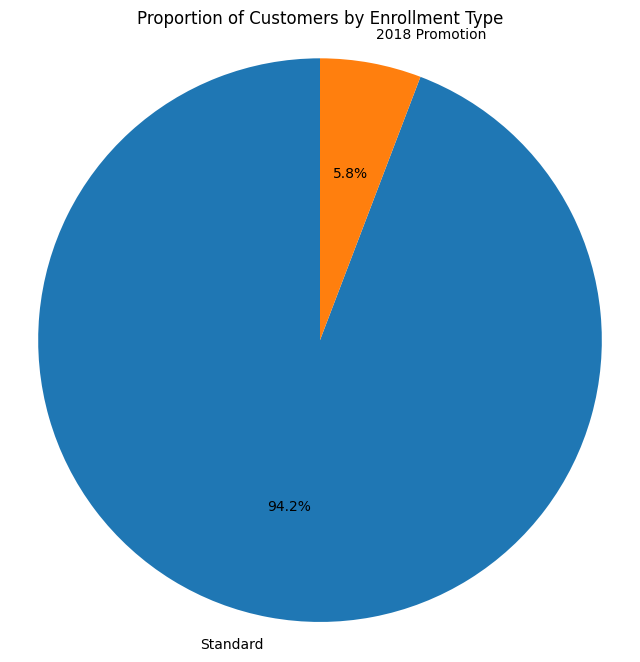

In [29]:
#Customer proportions by enrollment type

enrollment_counts = lyt_hist['Enrollment Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(enrollment_counts, labels=enrollment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Customers by Enrollment Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()